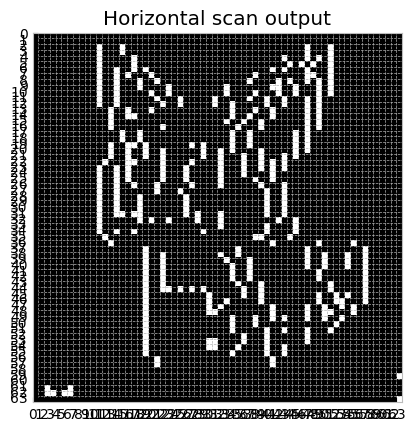

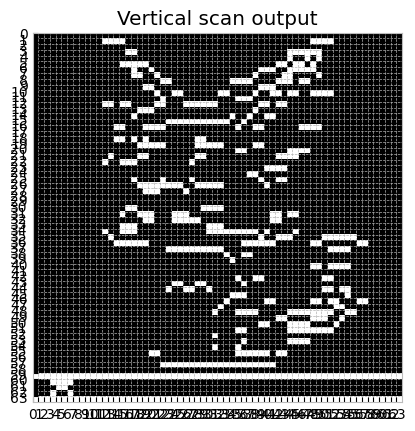

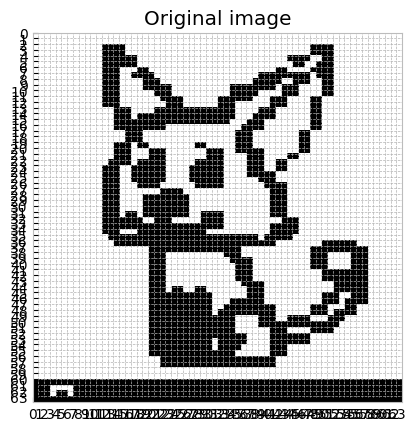

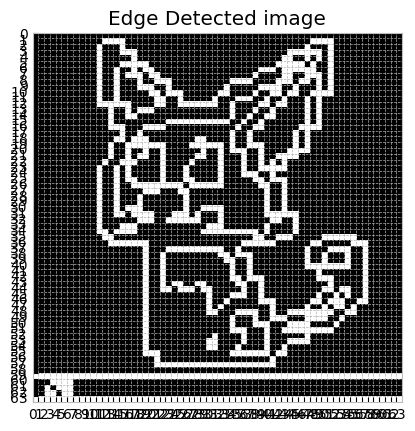

In [2]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.visualization import *
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from matplotlib import style
from PIL import Image

style.use('bmh')

# Function to load and convert the image to binary (grayscale)
def load_image(image_path):
    # Open the image and convert it to grayscale
    img = Image.open(image_path).convert('L')
    
    # Resize to 8x8 for simplicity in this example
    img = img.resize((64,64))
    
    # Convert the image to a numpy array
    img_data = np.array(img)
    
    # Normalize the image: 1 for white, 0 for black
    img_bin = (img_data > 128).astype(int)  # Binarize the image with threshold 128
    return img_bin

# Function for plotting the image using matplotlib
def plot_image(img, title: str):
    plt.title(title)
    plt.xticks(range(img.shape[0]))
    plt.yticks(range(img.shape[1]))
    plt.imshow(img, extent=[0, img.shape[0], img.shape[1], 0], cmap='gray')
    plt.show()

# Function to apply amplitude encoding to the image
def amplitude_encode(img_data):
    rms = np.sqrt(np.sum(np.sum(img_data**2, axis=1)))
    image_norm = [ele / rms for arr in img_data for ele in arr]
    return np.array(image_norm)

# Load the image from a file path
image_path = "C:/Users/itzme/OneDrive/Desktop/dog.png"  # Replace with the actual image file path
image = load_image(image_path)

# Get the amplitude-encoded pixel values
image_norm_h = amplitude_encode(image)
image_norm_v = amplitude_encode(image.T)

# Initialize some global variables for the number of qubits
data_qb = 12
anc_qb = 1
total_qb = data_qb + anc_qb

# Initialize the amplitude permutation unitary
D2n_1 = np.roll(np.identity(2**total_qb), 1, axis=1)

# Create the circuit for horizontal scan
qc_h = QuantumCircuit(total_qb)
qc_h.initialize(image_norm_h, range(1, total_qb))
qc_h.h(0)
qc_h.unitary(D2n_1, range(total_qb))
qc_h.h(0)

# Create the circuit for vertical scan
qc_v = QuantumCircuit(total_qb)
qc_v.initialize(image_norm_v, range(1, total_qb))
qc_v.h(0)
qc_v.unitary(D2n_1, range(total_qb))
qc_v.h(0)

# Use the Aer simulator backend for statevectors
backend = Aer.get_backend('statevector_simulator')

# Transpile the circuits for the backend
transpiled_qc_h = transpile(qc_h, backend)
transpiled_qc_v = transpile(qc_v, backend)

# Run the circuits directly on the backend
job_h = backend.run(transpiled_qc_h)
job_v = backend.run(transpiled_qc_v)

# Get the results
result_h = job_h.result()
result_v = job_v.result()

# Extract the statevectors
sv_h = result_h.get_statevector()
sv_v = result_v.get_statevector()

# Define a lambda function for thresholding to binary values
threshold = lambda amp: (amp > 1e-15 or amp < -1e-15)

# Selecting odd states from the raw statevector and reshaping column vector of size 64 to an 8x8 matrix
edge_scan_h = np.abs(np.array([1 if threshold(sv_h[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(64,64)
edge_scan_v = np.abs(np.array([1 if threshold(sv_v[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(64,64).T

# Plotting the Horizontal and Vertical scans
plot_image(edge_scan_h, 'Horizontal scan output')
plot_image(edge_scan_v, 'Vertical scan output')

# Combining the horizontal and vertical components of the result
edge_scan_sim = edge_scan_h | edge_scan_v

# Plotting the original and edge-detected images
plot_image(image, 'Original image')
plot_image(edge_scan_sim, 'Edge Detected image')


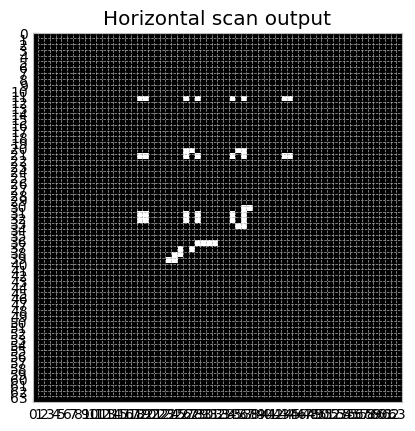

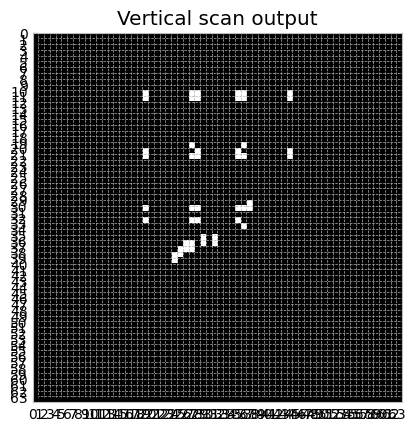

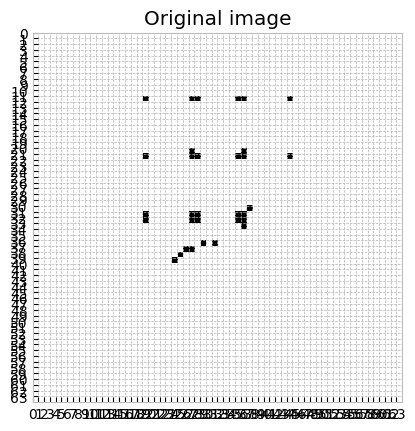

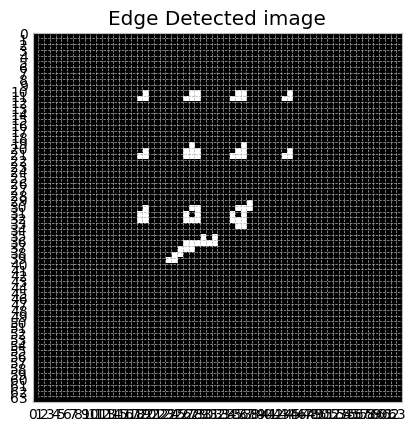

In [2]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.visualization import *
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from matplotlib import style
from PIL import Image

style.use('bmh')

# Function to load and convert the image to binary (grayscale)
def load_image(image_path):
    # Open the image and convert it to grayscale
    img = Image.open(image_path).convert('L')
    
    # Resize to 8x8 for simplicity in this example
    img = img.resize((64,64))
    
    # Convert the image to a numpy array
    img_data = np.array(img)
    
    # Normalize the image: 1 for white, 0 for black
    img_bin = (img_data > 128).astype(int)  # Binarize the image with threshold 128
    return img_bin

# Function for plotting the image using matplotlib
def plot_image(img, title: str):
    plt.title(title)
    plt.xticks(range(img.shape[0]))
    plt.yticks(range(img.shape[1]))
    plt.imshow(img, extent=[0, img.shape[0], img.shape[1], 0], cmap='gray')
    plt.show()

# Function to apply amplitude encoding to the image
def amplitude_encode(img_data):
    rms = np.sqrt(np.sum(np.sum(img_data**2, axis=1)))
    image_norm = [ele / rms for arr in img_data for ele in arr]
    return np.array(image_norm)

# Load the image from a file path
image_path ="C:/Users/itzme/OneDrive/Desktop/chocolate2.png"  # Replace with the actual image file path
image = load_image(image_path)

# Get the amplitude-encoded pixel values
image_norm_h = amplitude_encode(image)
image_norm_v = amplitude_encode(image.T)

# Initialize some global variables for the number of qubits
data_qb = 12
anc_qb = 1
total_qb = data_qb + anc_qb

# Initialize the amplitude permutation unitary
D2n_1 = np.roll(np.identity(2**total_qb), 1, axis=1)

# Create the circuit for horizontal scan
qc_h = QuantumCircuit(total_qb)
qc_h.initialize(image_norm_h, range(1, total_qb))
qc_h.h(0)
qc_h.unitary(D2n_1, range(total_qb))
qc_h.h(0)

# Create the circuit for vertical scan
qc_v = QuantumCircuit(total_qb)
qc_v.initialize(image_norm_v, range(1, total_qb))
qc_v.h(0)
qc_v.unitary(D2n_1, range(total_qb))
qc_v.h(0)

# Use the Aer simulator backend for statevectors
backend = Aer.get_backend('statevector_simulator')

# Transpile the circuits for the backend
transpiled_qc_h = transpile(qc_h, backend)
transpiled_qc_v = transpile(qc_v, backend)

# Run the circuits directly on the backend
job_h = backend.run(transpiled_qc_h)
job_v = backend.run(transpiled_qc_v)

# Get the results
result_h = job_h.result()
result_v = job_v.result()

# Extract the statevectors
sv_h = result_h.get_statevector()
sv_v = result_v.get_statevector()

# Define a lambda function for thresholding to binary values
threshold = lambda amp: (amp > 1e-15 or amp < -1e-15)

# Selecting odd states from the raw statevector and reshaping column vector of size 64 to an 8x8 matrix
edge_scan_h = np.abs(np.array([1 if threshold(sv_h[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(64,64)
edge_scan_v = np.abs(np.array([1 if threshold(sv_v[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(64,64).T

# Plotting the Horizontal and Vertical scans
plot_image(edge_scan_h, 'Horizontal scan output')
plot_image(edge_scan_v, 'Vertical scan output')

# Combining the horizontal and vertical components of the result
edge_scan_sim = edge_scan_h | edge_scan_v

# Plotting the original and edge-detected images
plot_image(image, 'Original image')
plot_image(edge_scan_sim, 'Edge Detected image')


<Figure size 640x480 with 0 Axes>

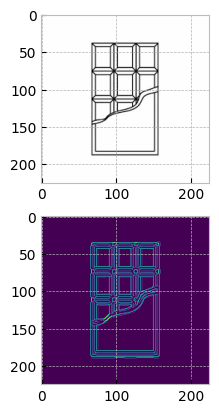

In [5]:
#canny edge detection classical edge detection code
import numpy as np 
import os 
import cv2 
import matplotlib.pyplot as plt 


# defining the canny detector function 

# here weak_th and strong_th are thresholds for 
# double thresholding step 
def Canny_detector(img, weak_th = None, strong_th = None): 
	
	# conversion of image to grayscale 
	img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
	
	# Noise reduction step 
	img = cv2.GaussianBlur(img, (5, 5), 1.4) 
	
	# Calculating the gradients 
	gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3) 
	gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3) 
	
	# Conversion of Cartesian coordinates to polar 
	mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True) 
	
	# setting the minimum and maximum thresholds 
	# for double thresholding 
	mag_max = np.max(mag) 
	if not weak_th:weak_th = mag_max * 0.1
	if not strong_th:strong_th = mag_max * 0.5
	
	# getting the dimensions of the input image 
	height, width = img.shape 
	
	# Looping through every pixel of the grayscale 
	# image 
	for i_x in range(width): 
		for i_y in range(height): 
			
			grad_ang = ang[i_y, i_x] 
			grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang) 
			
			# selecting the neighbours of the target pixel 
			# according to the gradient direction 
			# In the x axis direction 
			if grad_ang<= 22.5: 
				neighb_1_x, neighb_1_y = i_x-1, i_y 
				neighb_2_x, neighb_2_y = i_x + 1, i_y 
			
			# top right (diagonal-1) direction 
			elif grad_ang>22.5 and grad_ang<=(22.5 + 45): 
				neighb_1_x, neighb_1_y = i_x-1, i_y-1
				neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
			
			# In y-axis direction 
			elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90): 
				neighb_1_x, neighb_1_y = i_x, i_y-1
				neighb_2_x, neighb_2_y = i_x, i_y + 1
			
			# top left (diagonal-2) direction 
			elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135): 
				neighb_1_x, neighb_1_y = i_x-1, i_y + 1
				neighb_2_x, neighb_2_y = i_x + 1, i_y-1
			
			# Now it restarts the cycle 
			elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180): 
				neighb_1_x, neighb_1_y = i_x-1, i_y 
				neighb_2_x, neighb_2_y = i_x + 1, i_y 
			
			# Non-maximum suppression step 
			if width>neighb_1_x>= 0 and height>neighb_1_y>= 0: 
				if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]: 
					mag[i_y, i_x]= 0
					continue

			if width>neighb_2_x>= 0 and height>neighb_2_y>= 0: 
				if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]: 
					mag[i_y, i_x]= 0

	weak_ids = np.zeros_like(img) 
	strong_ids = np.zeros_like(img)			 
	ids = np.zeros_like(img) 
	
	# double thresholding step 
	for i_x in range(width): 
		for i_y in range(height): 
			
			grad_mag = mag[i_y, i_x] 
			
			if grad_mag<weak_th: 
				mag[i_y, i_x]= 0
			elif strong_th>grad_mag>= weak_th: 
				ids[i_y, i_x]= 1
			else: 
				ids[i_y, i_x]= 2
	
	
	# finally returning the magnitude of 
	# gradients of edges 
	return mag 

frame = cv2.imread(r"C:/Users/itzme/OneDrive/Desktop/chocolate2.png") 

# calling the designed function for 
# finding edges 
canny_img = Canny_detector(frame) 

# Displaying the input and output image 
plt.figure() 
f, plots = plt.subplots(2, 1) 
plots[0].imshow(frame) 
plots[1].imshow(canny_img) 
